In [41]:
# IMPORTING LIBRARIES
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from sklearn import svm
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor

#### QUESTION 1

In [42]:
# LOADING THE DATASETS - PredictorData.xls AND PredictorData2021.xlsx
df2005 = pd.read_excel('PredictorData.xls')
df2021 = pd.read_excel('PredictorData2021.xlsx')

# GETTING INFORMATION ABOUT THE DATASETS
df2005.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1620 entries, 0 to 1619
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   yyyymm      1620 non-null   int64  
 1   Index       1620 non-null   float64
 2   D12         1620 non-null   float64
 3   E12         1620 non-null   float64
 4   b/m         1018 non-null   float64
 5   tbl         1031 non-null   float64
 6   AAA         1044 non-null   float64
 7   BAA         1044 non-null   float64
 8   lty         1044 non-null   float64
 9   ntis        949 non-null    float64
 10  Rfree       1620 non-null   float64
 11  infl        1115 non-null   float64
 12  ltr         960 non-null    float64
 13  corpr       960 non-null    float64
 14  svar        1451 non-null   float64
 15  csp         788 non-null    float64
 16  CRSP_SPvw   960 non-null    float64
 17  CRSP_SPvwx  960 non-null    float64
dtypes: float64(17), int64(1)
memory usage: 227.9 KB


In [43]:
df2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1812 entries, 0 to 1811
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   yyyymm      1812 non-null   int64  
 1   Index       1812 non-null   float64
 2   D12         1812 non-null   float64
 3   E12         1812 non-null   float64
 4   b/m         1210 non-null   float64
 5   tbl         1224 non-null   float64
 6   AAA         1236 non-null   float64
 7   BAA         1236 non-null   float64
 8   lty         1236 non-null   float64
 9   ntis        1141 non-null   float64
 10  Rfree       1811 non-null   float64
 11  infl        1307 non-null   float64
 12  ltr         1152 non-null   float64
 13  corpr       1152 non-null   float64
 14  svar        1643 non-null   float64
 15  csp         788 non-null    float64
 16  CRSP_SPvw   1152 non-null   float64
 17  CRSP_SPvwx  1152 non-null   float64
dtypes: float64(17), int64(1)
memory usage: 254.9 KB


#### QUESTION 2

In [44]:
df2005

,yyyymm,Index,D12,E12,b/m,tbl,AAA,BAA,lty,ntis,Rfree,infl,ltr,corpr,svar,csp,CRSP_SPvw,CRSP_SPvwx
0,187101,4.44,0.260000,0.40,NaN,NaN,NaN,NaN,NaN,NaN,0.004955,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,187102,4.50,0.260000,0.40,NaN,NaN,NaN,NaN,NaN,NaN,0.004514,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,187103,4.61,0.260000,0.40,NaN,NaN,NaN,NaN,NaN,NaN,0.004243,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,187104,4.74,0.260000,0.40,NaN,NaN,NaN,NaN,NaN,NaN,0.004632,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,187105,4.86,0.260000,0.40,NaN,NaN,NaN,NaN,NaN,NaN,0.003691,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1615,200508,1220.33,21.292000,65.50,0.335731,0.0344,0.0509,0.0596,0.0432,0.004658,0.002867,0.005118,0.0333,0.0233,0.000697,NaN,-0.0092,-0.0113
1616,200509,1228.81,21.475000,66.57,0.332964,0.0342,0.0513,0.0603,0.0464,0.006060,0.002850,0.012220,-0.0338,-0.0310,0.000660,NaN,0.0080,0.0068
1617,200510,1207.01,21.723333,67.69,0.337067,0.0371,0.0535,0.0630,0.0484,0.005057,0.003092,0.002012,-0.0196,-0.0204,0.001818,NaN,-0.0156,-0.0166
1618,200511,1249.48,21.971667,68.81,0.325656,0.0388,0.0542,0.0639,0.0481,0.006151,0.003233,-0.008032,0.0076,0.0099,0.000540,NaN,0.0384,0.0358


In [45]:
# RECREATION OF PREDICTOR VARIABLES - DEFAULT YIELD SPREAD - dfy
DefaultYieldSpread  = df2005["BAA"] - df2005["AAA"]

# RECREATION OF PREDICTOR VARIABLES - DIVIDEND PAYOUT RATIO - d/e
DividendPayoutRatio = np.log(df2005['D12']) - np.log(df2005['E12'])

# RECREATION OF PREDICTOR VARIABLES - TERM SPREAD - tms
TermSpread = df2005['lty'] - df2005['tbl']

# RECREATION OF PREDICTOR VARIABLES - DEFAULT RETURN SPREAD - dfr
DefaultReturnSpread = df2005['corpr'] - df2005['lty']

# RECREATION OF PREDICTOR VARIABLES - DIVIDEND PRICE RATIO - d/p
DividendPriceRatio = np.log(df2005['D12']) - np.log(df2005['Index'])

# RECREATION OF PREDICTOR VARIABLES - DIVIDEND YIELD - d/y
DividendYield = np.log(df2005['D12']) - np.log(df2005['Index'].shift(1))

# RECREATION OF PREDICTOR VARIABLES - EARNING PRICE RATIO - e/p
EarningPriceRatio = np.log(df2005['E12']) - np.log(df2005['Index'])

# CALCULATION OF THE DEPENDENT VARIABLE - equity premium
EquityPremium = df2005['CRSP_SPvw'] - df2005['Rfree']

In [46]:
# RECREATING THE DATAFRAME CONSOLIDATED DATAFRAME
consolidatedDF = pd.DataFrame()
consolidatedDF['Default Yield Spread'] = DefaultYieldSpread
consolidatedDF['Inflation'] = df2005['infl']
consolidatedDF['Stock Variance'] = df2005['svar']
consolidatedDF['Dividend Payout Ratio'] = DividendPayoutRatio
consolidatedDF['Long Term Yield'] = df2005['lty']
consolidatedDF['Term Spread'] = TermSpread
consolidatedDF['Treasury-bill rate'] = df2005['tbl']
consolidatedDF['Default Return Spread'] = DefaultReturnSpread
consolidatedDF['Dividend Price Ratio'] = DividendPriceRatio
consolidatedDF['Dividend Yield'] = DividendYield
consolidatedDF['Long Term Return'] = df2005['lty']
consolidatedDF['Earning Price Ratio'] = EarningPriceRatio
consolidatedDF['Book to Market'] = df2005['b/m']
consolidatedDF['Net Equity Expansion'] = df2005['ntis']

# ADDING THE DEPENDENT VARIABLE - EQUITY PREMIUM
consolidatedDF['Equity Premium'] = EquityPremium

# ADDING THE DATE COLUMN TO THE CONSOLIDATED DATAFRAME
date = pd.to_datetime(df2005['yyyymm'], format = '%Y%m')
consolidatedDF['Date'] = date

# DISPLAYING THE CONSOLIDATED DATAFRAME
consolidatedDF

,Default Yield Spread,Inflation,Stock Variance,Dividend Payout Ratio,Long Term Yield,Term Spread,Treasury-bill rate,Default Return Spread,Dividend Price Ratio,Dividend Yield,Long Term Return,Earning Price Ratio,Book to Market,Net Equity Expansion,Equity Premium,Date
0,NaN,NaN,NaN,-0.430783,NaN,NaN,NaN,NaN,-2.837728,NaN,NaN,-2.406945,NaN,NaN,NaN,1871-01-01
1,NaN,NaN,NaN,-0.430783,NaN,NaN,NaN,NaN,-2.851151,-2.837728,NaN,-2.420368,NaN,NaN,NaN,1871-02-01
2,NaN,NaN,NaN,-0.430783,NaN,NaN,NaN,NaN,-2.875302,-2.851151,NaN,-2.444519,NaN,NaN,NaN,1871-03-01
3,NaN,NaN,NaN,-0.430783,NaN,NaN,NaN,NaN,-2.903111,-2.875302,NaN,-2.472328,NaN,NaN,NaN,1871-04-01
4,NaN,NaN,NaN,-0.430783,NaN,NaN,NaN,NaN,-2.928112,-2.903111,NaN,-2.497329,NaN,NaN,NaN,1871-05-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1615,0.0087,0.005118,0.000697,-1.123719,0.0432,0.0088,0.0344,-0.0199,-4.048545,-4.059831,0.0432,-2.924826,0.335731,0.004658,-0.012067,2005-08-01
1616,0.0090,0.012220,0.000660,-1.131365,0.0464,0.0122,0.0342,-0.0774,-4.046912,-4.039987,0.0464,-2.915547,0.332964,0.006060,0.005150,2005-09-01
1617,0.0095,0.002012,0.001818,-1.136552,0.0484,0.0113,0.0371,-0.0688,-4.017515,-4.035415,0.0484,-2.880963,0.337067,0.005057,-0.018692,2005-10-01
1618,0.0097,-0.008032,0.000540,-1.141595,0.0481,0.0093,0.0388,-0.0382,-4.040729,-4.006148,0.0481,-2.899134,0.325656,0.006151,0.035167,2005-11-01


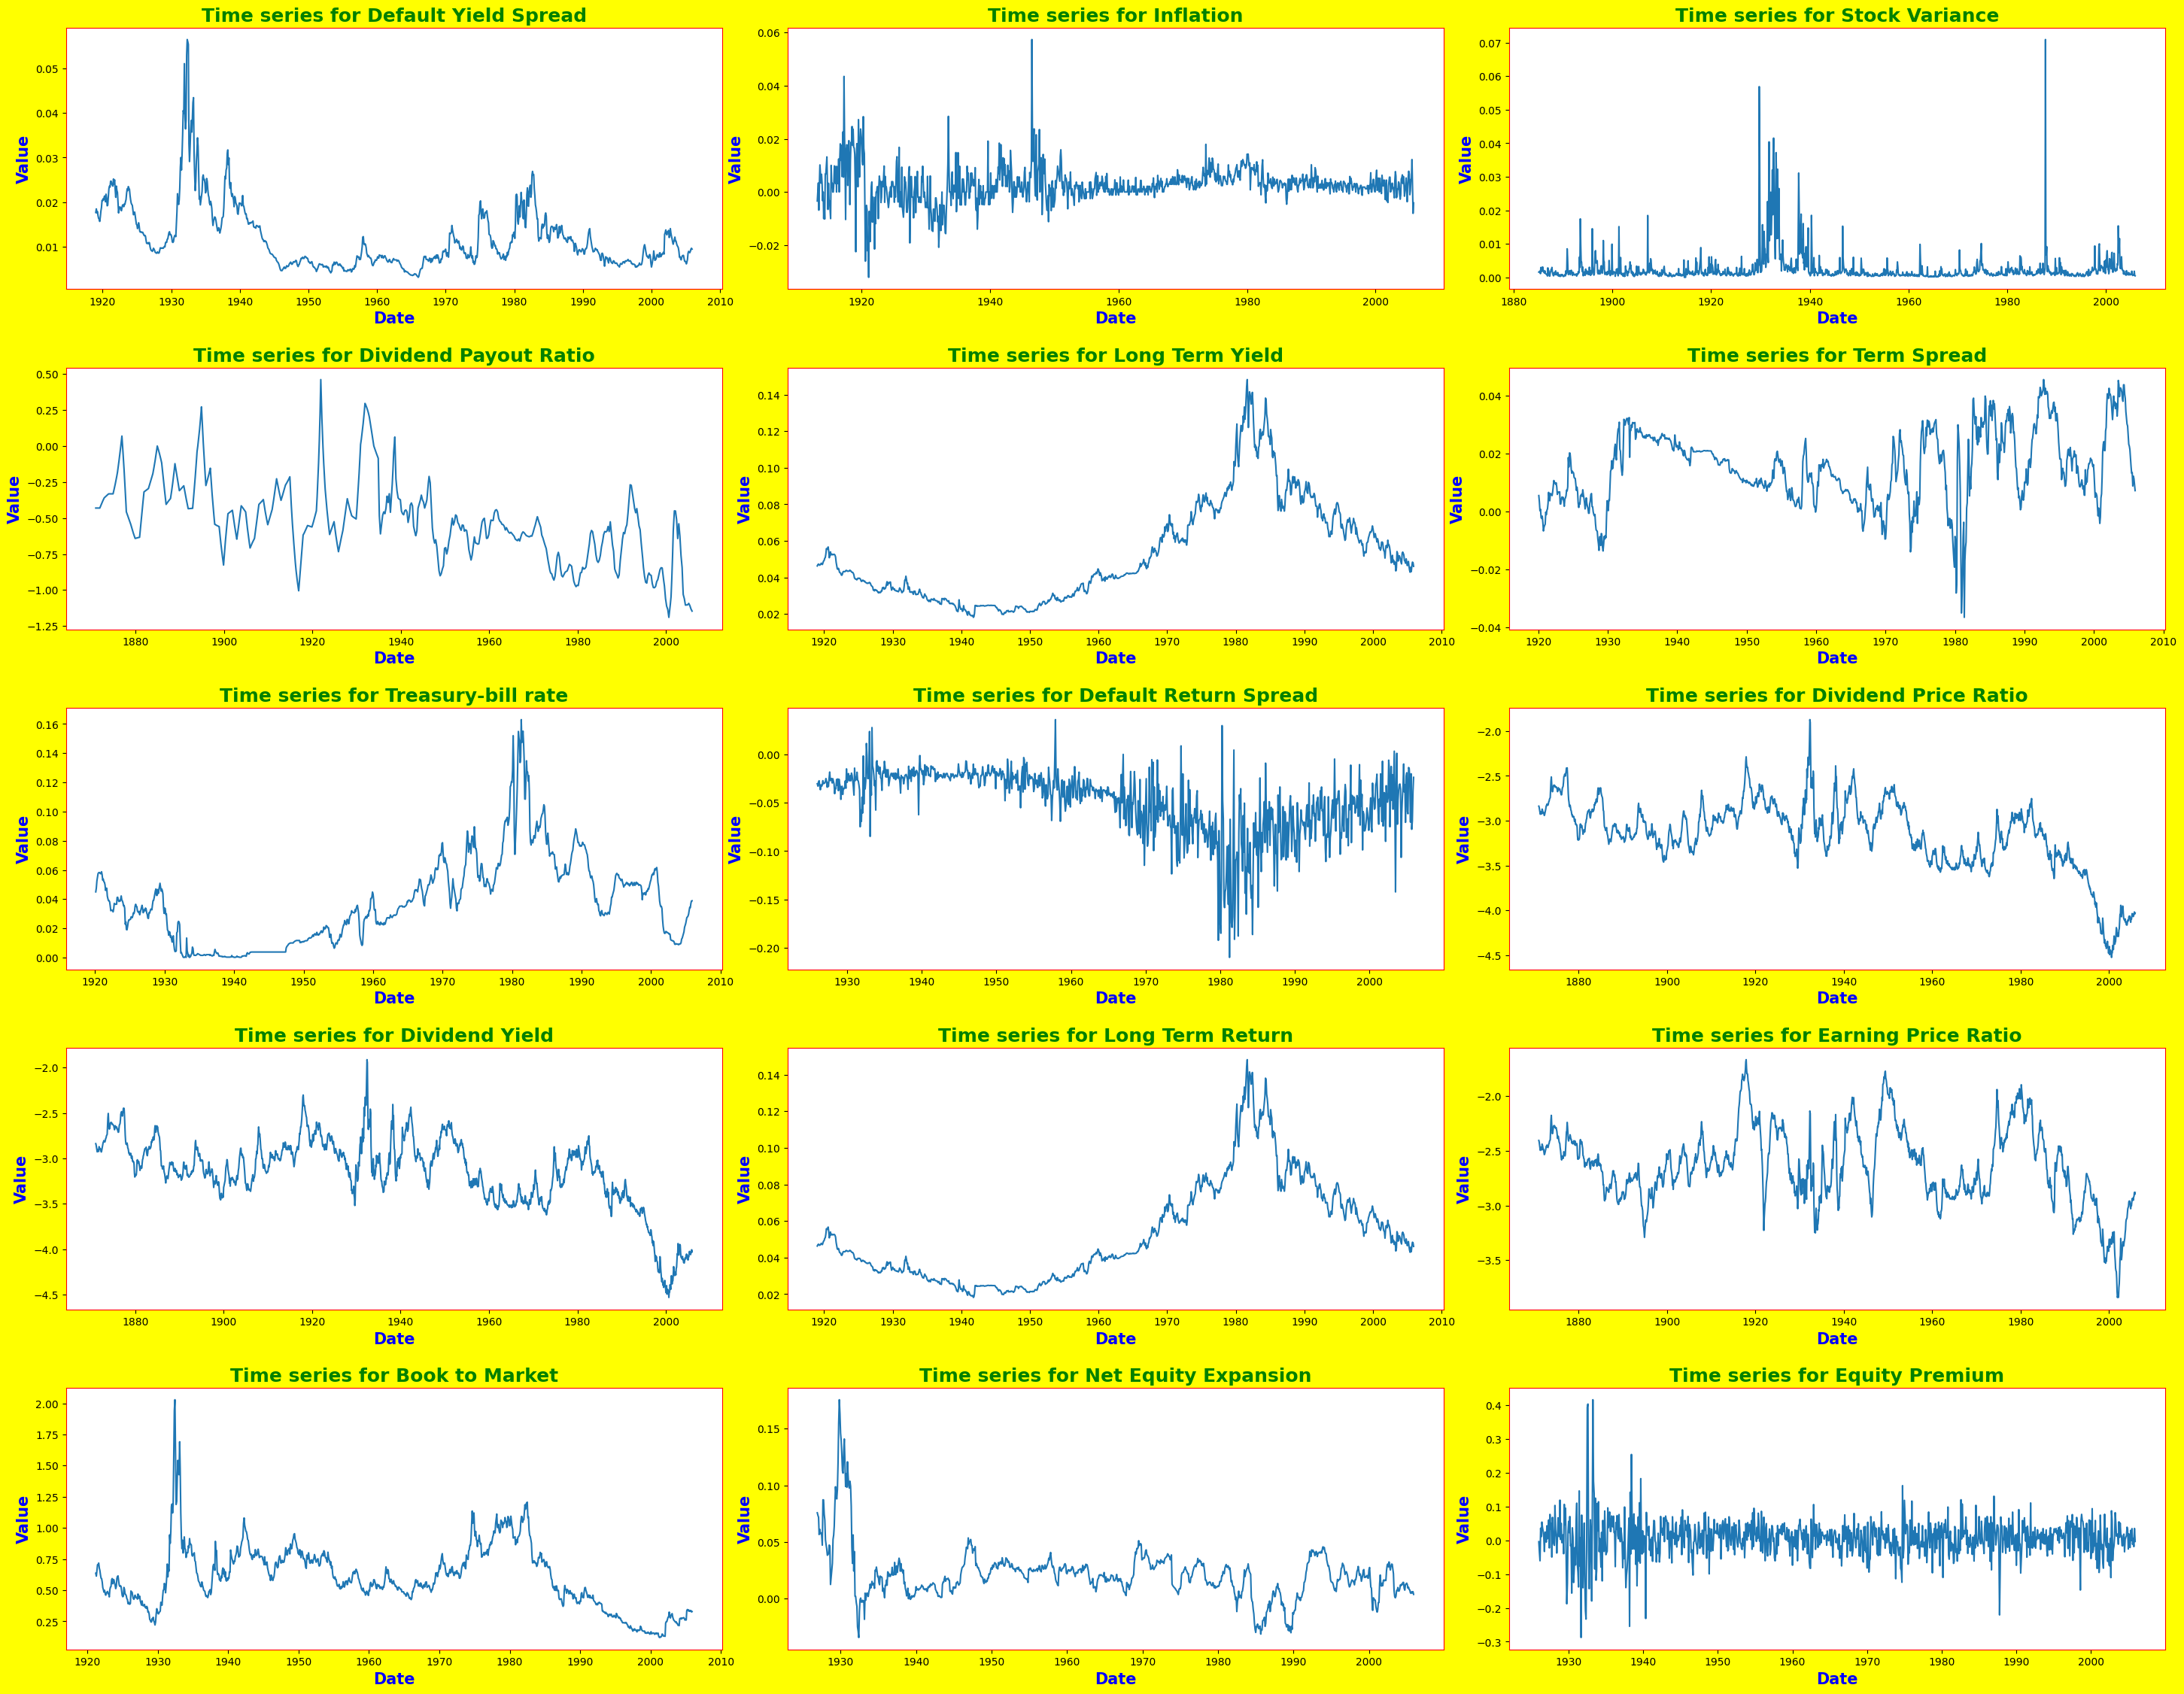

In [47]:
# CREATING TIME SERIES SUBPLOTS FOR EACH VARIABLE 5X3
figure, axes = plt.subplots(nrows=5, ncols=3, figsize=(36, 28))

# FIGURE PROPERTIES
plt.rcParams['figure.facecolor'] = 'yellow'
plt.rcParams['figure.edgecolor'] = 'red'

# SET MARGINS OF THE SUBPLOTS
plt.subplots_adjust(wspace=0.1, hspace=0.3)

# SUBPLOT PROPERTIES
plt.rcParams['axes.edgecolor'] = 'red'
plt.rcParams['axes.facecolor'] = 'white'

for i, ax in enumerate(axes.flatten()):
    # GRAPH PROPERTIES
    ax.set_title(
        f'Time series for {consolidatedDF.iloc[:, i].name}', color = 'g', fontsize = 18, fontweight = 'bold')
    ax.set_xlabel('Date', color = 'b', fontsize = 15, fontweight = 'bold')
    ax.set_ylabel('Value', color = 'b', fontsize = 15, fontweight = 'bold')

    # PLOTTING THE RAINFALL FOR EACH DISTRICT
    ax.plot(consolidatedDF['Date'], consolidatedDF.iloc[:, i])


#### QUESTION 3

In [48]:
# 2021 DEFAULT YIELD SPREAD - dfy
DefaultYieldSpread21 = df2021["BAA"] - df2021["AAA"]

# 2021 DIVIDEND PAYOUT RATIO - d/e
DividendPayoutRatio21 = np.log(df2021['D12']) - np.log(df2021['E12'])

# 2021 TERM SPREAD - tms
TermSpread21 = df2021['lty'] - df2021['tbl']

# 2021 DEFAULT RETURN SPREAD - dfr
DefaultReturnSpread21 = df2021['corpr'] - df2021['lty']

# 2021 DIVIDEND PRICE RATIO - d/p
DividendPriceRatio21 = np.log(df2021['D12']) - np.log(df2021['Index'])

# 2021 DIVIDEND YIELD - d/y
DividendYield21 = np.log(df2021['D12']) - np.log(df2021['Index'].shift(1))

# 2021 EARNING PRICE RATIO - e/p
EarningPriceRatio21 = np.log(df2021['E12']) - np.log(df2021['Index'])

# CALCULATION OF THE DEPENDENT VARIABLE
y21 = df2021['CRSP_SPvw'] - df2021['Rfree']


In [49]:
# RECREATING THE DATAFRAME CONSOLIDATED DATAFRAME
consolidatedDF21 = pd.DataFrame()
consolidatedDF21['Default Yield Spread'] = DefaultYieldSpread21
consolidatedDF21['Inflation'] = df2021['infl']
consolidatedDF21['Stock Variance'] = df2021['svar']
consolidatedDF21['Dividend Payout Ratio'] = DividendPayoutRatio21
consolidatedDF21['Long Term Yield'] = df2021['lty']
consolidatedDF21['Term Spread'] = TermSpread21
consolidatedDF21['Treasury-bill rate'] = df2021['tbl']
consolidatedDF21['Default Return Spread'] = DefaultReturnSpread21
consolidatedDF21['Dividend Price Ratio'] = DividendPriceRatio21
consolidatedDF21['Dividend Yield'] = DividendYield21
consolidatedDF21['Long Term Return'] = df2021['ltr']
consolidatedDF21['Earning Price Ratio'] = EarningPriceRatio21
consolidatedDF21['Book to Market'] = df2021['b/m']
consolidatedDF21['Net Equity Expansion'] = df2021['ntis']

# ADDING THE DEPENDENT VARIABLE - EQUITY PREMIUM
consolidatedDF21['Equity Premium'] = y21

# ADDING THE DATE COLUMN TO THE CONSOLIDATED DATAFRAME
date = pd.to_datetime(df2021['yyyymm'], format = '%Y%m')
consolidatedDF21['Date'] = date

# MAKE THE DATE COLUMN THE INDEX
consolidatedDF21.set_index('Date', inplace = True)

# DISPLAYING THE CONSOLIDATED DATAFRAME
consolidatedDF21

,Default Yield Spread,Inflation,Stock Variance,Dividend Payout Ratio,Long Term Yield,Term Spread,Treasury-bill rate,Default Return Spread,Dividend Price Ratio,Dividend Yield,Long Term Return,Earning Price Ratio,Book to Market,Net Equity Expansion,Equity Premium
Date,,,,,,,,,,,,,,,
1871-01-01,NaN,NaN,NaN,-0.430783,NaN,NaN,NaN,NaN,-2.837728,NaN,NaN,-2.406945,NaN,NaN,NaN
1871-02-01,NaN,NaN,NaN,-0.430783,NaN,NaN,NaN,NaN,-2.851151,-2.837728,NaN,-2.420368,NaN,NaN,NaN
1871-03-01,NaN,NaN,NaN,-0.430783,NaN,NaN,NaN,NaN,-2.875302,-2.851151,NaN,-2.444519,NaN,NaN,NaN
1871-04-01,NaN,NaN,NaN,-0.430783,NaN,NaN,NaN,NaN,-2.903111,-2.875302,NaN,-2.472328,NaN,NaN,NaN
1871-05-01,NaN,NaN,NaN,-0.430783,NaN,NaN,NaN,NaN,-2.928112,-2.903111,NaN,-2.497329,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-01,0.0069,0.002066,0.000602,-1.060823,0.0128,0.0123,0.0005,-0.0173,-4.342866,-4.314287,-0.0035,-3.282042,0.184756,0.014846,0.030600
2021-09-01,0.0070,0.002716,0.001393,-1.085057,0.0137,0.0133,0.0004,-0.0331,-4.286281,-4.335019,-0.0250,-3.201224,0.193036,0.015598,-0.046076
2021-10-01,0.0067,0.008308,0.001151,-1.120472,0.0158,0.0153,0.0005,0.0001,-4.346732,-4.279874,0.0051,-3.226260,0.182389,0.013368,0.070510


In [50]:
DF19652008 = consolidatedDF21.loc['1964-11-1':'2008-12-31'] # DATA FROM 1965 TO 2008
DF19762008 = consolidatedDF21.loc['1975-11-1':'2008-12-31'] # DATA FROM 1976 TO 2008
DF20002008 = consolidatedDF21.loc['1999-11-1':'2008-12-31'] # DATA FROM 1965 TO 2000

In [51]:
# FUNCTION TO ROLLING MULTIPLE REGRESSION ON A DATAFRAME
def rollingMultiple(periodDF, modelName):
    yMeans = []
    yPreds = []

    # THIS IS THE EQUITY PREMIUM COLUMN FROM JANUARY 1966 TO DECEMBER 2008 (3RD ROW TO THE END OF THE DATAFRAME)
    yTests = periodDF.iloc[2:, 14:]

    # STARTING WITH THE FIRST MONTH IN THE DATAFRAME - 1ST ROW X
    xTrain = periodDF.iloc[:1, :-1]
    # STARTING WITH THE SECOND MONTH IN THE DATAFRAME ON Y - EQUITY PREMIUM COLUMN
    yTrain = periodDF.iloc[1:2, 14:]
    # TESTING WITH THE SECOND MONTH IN THE DATAFRAME - 2ND ROW X
    xTest = periodDF.iloc[1:2, :-1]

    # LOOPING THROUGH THE DATAFRAME
    for i in range(1, len(periodDF) - 1):

        # TRAINING A LINEAR REGRESSION MODEL ON THE TRAINING DATA
        model = modelName.fit(xTrain, yTrain)

        # PREDICTING THE EQUITY PREMIUM
        yPred = model.predict(xTest)
        yPreds.append(yPred[0])

        # APPENDING THE MEAN OF THE EQUITY PREMIUM
        yMeans.append(yTrain.mean())

        # APPENDING THE NEXT MONTH TO THE TRAINING SET
        xTrain = xTrain.append(periodDF.iloc[i:i+1, :-1])

        # APPENDING THE NEXT MONTH TO THE TESTING SET
        xTest = periodDF.iloc[i+1:i+2, :-1]

        # APPENDING THE NEXT MONTH TO THE TRAINING SET
        yTrain = yTrain.append(periodDF.iloc[i+1:i+2, 14:])

    # R SQUARED CALCULATION: R2 = 1 - (RSS / TSS); R2 = 1 - (sum((yPreds - yTests)**2) / sum((yMeans - yTests)**2))
    RSS = mean_squared_error(yTests, yPreds)
    TSS = mean_squared_error(yTests, yMeans)
    print('R squared is:', 1 - (RSS / TSS))

    # ROOT MEAN SQUARED ERROR CALCULATION: RMSE = sqrt(RSS); RMSE = sqrt(sum((yPreds - yTests)**2) / len(yTests))
    # or - mean_squared_error(yTests, yPreds, squared = False)
    print('RMSE is:', np.sqrt(RSS))

    # MEAN ABSOLUTE ERROR CALCULATION: MAE = sum(abs(yPreds - yTests)) / len(yTests)
    print('MAE is:', mean_absolute_error(yTests, yPreds))
    
    # RESULTS DATAFRAME FOR R SQUARED, RMSE AND MAE
    results = pd.DataFrame()
    results['R SQUARED'] = [1 - (RSS / TSS)]
    results['RMSE'] = [np.sqrt(RSS)]
    results['MAE'] = [mean_absolute_error(yTests, yPreds)]
    return results

# 1965 - 2008 PERIOD

In [52]:
# ROLLING MULTIPLE REGRESSION ON THE DATAFRAME FROM 1965 TO 2008
rollingMultiple(DF19652008, LinearRegression())

R squared is: -0.3613835270547614
RMSE is: 0.05098780039836125
MAE is: 0.037396088336848064


,R SQUARED,RMSE,MAE
0,-0.361384,0.050988,0.037396


# 1976 - 2008 PERIOD

In [53]:
# ROLLING MULTIPLE REGRESSION ON THE DATAFRAME FROM 1976 TO 2008
rollingMultiple(DF19762008, LinearRegression())

R squared is: -0.5336982366759857
RMSE is: 0.054347692171764314
MAE is: 0.03884641760244666


,R SQUARED,RMSE,MAE
0,-0.533698,0.054348,0.038846


# DF2000 - 2008 PERIOD

In [54]:
# ROLLING MULTIPLE REGRESSION ON THE DATAFRAME FROM 2000 TO 2008
rollingMultiple(DF20002008, LinearRegression())

R squared is: -2.349439286062306
RMSE is: 0.08357754929192443
MAE is: 0.05408944075550338


,R SQUARED,RMSE,MAE
0,-2.349439,0.083578,0.054089


#### QUESTION 4

In [55]:
# IMPROVING THE MODEL PERFORMANCE PROPSESED BY WELCH AND GOYAL (2008) USING SVM REGRESSOR - PERIOD 1965 TO 2008
rollingMultiple(DF19652008, svm.SVR())

R squared is: -0.18777963083550975
RMSE is: 0.04762598469097397
MAE is: 0.03709022843190601


,R SQUARED,RMSE,MAE
0,-0.18778,0.047626,0.03709


In [56]:
# IMPROVING THE MODEL PERFORMANCE PROPSESED BY WELCH AND GOYAL (2008) USING SVM REGRESSOR - PERIOD 1976 TO 2008
rollingMultiple(DF19762008, svm.SVR())

R squared is: -0.28805748297495404
RMSE is: 0.04980566810930251
MAE is: 0.03892661835135158


,R SQUARED,RMSE,MAE
0,-0.288057,0.049806,0.038927


In [57]:
# IMPROVING THE MODEL PERFORMANCE PROPSESED BY WELCH AND GOYAL (2008) USING SVM REGRESSOR - PERIOD 2000 TO 2008
rollingMultiple(DF20002008, svm.SVR())

R squared is: -0.028397267099288248
RMSE is: 0.04631098671981716
MAE is: 0.035602746594188286


,R SQUARED,RMSE,MAE
0,-0.028397,0.046311,0.035603


In [58]:
# IMPROVING THE MODEL PERFORMANCE PROPSESED BY WELCH AND GOYAL (2008) USING GRADIENT BOOSTING REGRESSION OR ADABOOST REGRESSION - PERIOD 1965 TO 2008
rollingMultiple(DF19652008, GradientBoostingRegressor())

R squared is: -0.35348687268130474
RMSE is: 0.0508397089190022
MAE is: 0.03755019914566415


,R SQUARED,RMSE,MAE
0,-0.353487,0.05084,0.03755


In [59]:
# IMPROVING THE MODEL PERFORMANCE PROPSESED BY WELCH AND GOYAL (2008) USING GRADIENT BOOSTING REGRESSION OR ADABOOST REGRESSION - PERIOD 1976 TO 2008
rollingMultiple(DF19762008, GradientBoostingRegressor())


R squared is: -0.3998553489959751
RMSE is: 0.051922157269934675
MAE is: 0.038859836804532116


,R SQUARED,RMSE,MAE
0,-0.399855,0.051922,0.03886


In [60]:
# IMPROVING THE MODEL PERFORMANCE PROPSESED BY WELCH AND GOYAL (2008) USING GRADIENT BOOSTING REGRESSION OR ADABOOST REGRESSION - PERIOD 2000 TO 2008
rollingMultiple(DF20002008, GradientBoostingRegressor())

R squared is: -0.4134058577413826
RMSE is: 0.054292147567617646
MAE is: 0.040148842534398245


,R SQUARED,RMSE,MAE
0,-0.413406,0.054292,0.040149
